# Necessary setup, peeking at sample data

In [10]:
import pandas as pd

# Path to the TAB data file
file_path = './pathtoyourdata/<LLRI_data>.TAB'

# Load and display the first few rows of the data file
data = pd.read_csv(file_path, sep='\t', header=None)
print(data.head())

# Display the types of each column to see if they are read correctly
print(data.dtypes)


                                                   0
0  2008-11-16T04:25:21.504,1,1,0,0,  -85.004440, ...
1  2008-11-16T04:25:22.403,1,1,0,0,  -85.050411, ...
2  2008-11-16T04:25:22.503,1,0,0,0,  -85.055523, ...
3  2008-11-16T04:25:23.003,1,1,0,0,  -85.081095, ...
4  2008-11-16T04:25:23.103,1,0,0,0,  -85.086209, ...
0    object
dtype: object


# Actually reading/plotting data

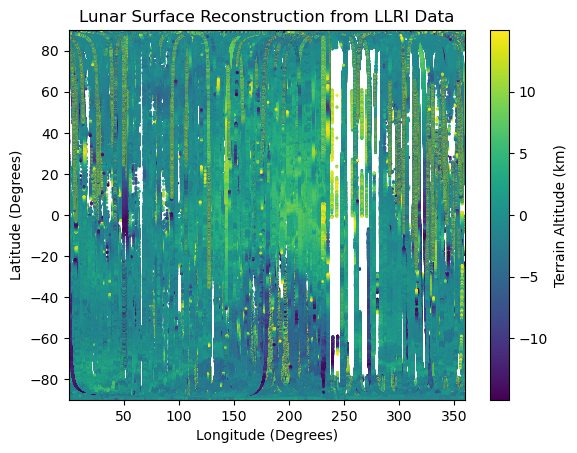

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data using comma as delimiter; seems to be csv upon inspection despite the TAB name
data = pd.read_csv(file_path, sep=',', header=None, names=[
    "UTC", "Altitude1_Status", "Altitude2_Status", "Altitude3_Status",
    "Altitude4_Status", "Laser_Pointing_Latitude", "Laser_Pointing_Longitude",
    "Range1_Terrain_Altitude", "Range2_Terrain_Altitude",
    "Range3_Terrain_Altitude", "Range4_Terrain_Altitude"
])

# Check and clean the data of NaNs and INFs- minor issue
data['Laser_Pointing_Latitude'] = pd.to_numeric(data['Laser_Pointing_Latitude'], errors='coerce')
data['Laser_Pointing_Longitude'] = pd.to_numeric(data['Laser_Pointing_Longitude'], errors='coerce')
data['Range1_Terrain_Altitude'] = pd.to_numeric(data['Range1_Terrain_Altitude'], errors='coerce')
data.dropna(inplace=True)

# Plotting
fig, ax = plt.subplots()
sc = ax.scatter(
    data['Laser_Pointing_Longitude'], 
    data['Laser_Pointing_Latitude'], 
    c=data['Range1_Terrain_Altitude'], 
    cmap='viridis', 
    s=1 # bigger point cloud dot size
)
plt.colorbar(sc, label='Terrain Altitude (km)')

ax.set_xlim(data['Laser_Pointing_Longitude'].min(), data['Laser_Pointing_Longitude'].max())
ax.set_ylim(data['Laser_Pointing_Latitude'].min(), data['Laser_Pointing_Latitude'].max())

ax.set_xlabel('Longitude (Degrees)')
ax.set_ylabel('Latitude (Degrees)')
ax.set_title('Lunar Surface Reconstruction from LLRI Data')
plt.show()
